In [30]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,accuracy_score


In [2]:
data=pd.read_csv(r"C:\Users\shray\Desktop\datasets\uber.csv")

In [3]:
df=data.copy()

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [7]:
df.dropna(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         199999 non-null  int64  
 1   key                199999 non-null  object 
 2   fare_amount        199999 non-null  float64
 3   pickup_datetime    199999 non-null  object 
 4   pickup_longitude   199999 non-null  float64
 5   pickup_latitude    199999 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 15.3+ MB


In [9]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Unnamed: 0         199999 non-null  int64              
 1   key                199999 non-null  object             
 2   fare_amount        199999 non-null  float64            
 3   pickup_datetime    199999 non-null  datetime64[ns, UTC]
 4   pickup_longitude   199999 non-null  float64            
 5   pickup_latitude    199999 non-null  float64            
 6   dropoff_longitude  199999 non-null  float64            
 7   dropoff_latitude   199999 non-null  float64            
 8   passenger_count    199999 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2), object(1)
memory usage: 15.3+ MB


In [11]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.999990e+05,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,2.771248e+07,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543
std,1.601386e+07,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382534e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774524e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155535e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [12]:
df.corr()

C:\Users\shray\AppData\Local\Temp\ipykernel_21092\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
Unnamed: 0,1.000000,0.000587,0.000230,-0.000341,0.000270,0.000271,0.002259
fare_amount,0.000587,1.000000,0.010458,-0.008482,0.008986,-0.011014,0.010158
pickup_longitude,0.000230,0.010458,1.000000,-0.816461,0.833026,-0.846324,-0.000415
pickup_latitude,-0.000341,-0.008482,-0.816461,1.000000,-0.774787,0.702367,-0.001559
dropoff_longitude,0.000270,0.008986,0.833026,-0.774787,1.000000,-0.917010,0.000033
dropoff_latitude,0.000271,-0.011014,-0.846324,0.702367,-0.917010,1.000000,-0.000659
passenger_count,0.002259,0.010158,-0.000415,-0.001559,0.000033,-0.000659,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1d0207ff9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d0207fff10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d0207ff7c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d020848490>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d020848730>],
 'means': []}

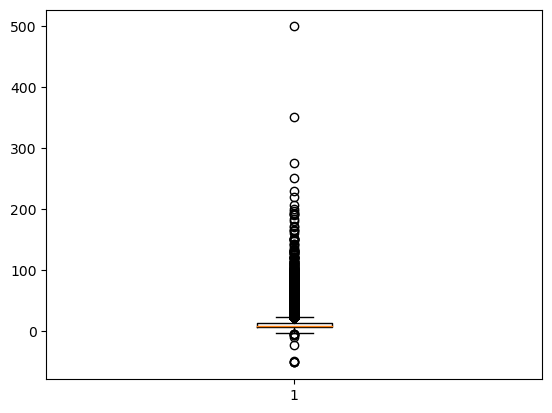

In [13]:
plt.boxplot(x=df['fare_amount'])

In [14]:
q1 = df['fare_amount'].quantile(0.25)
q3 = df['fare_amount'].quantile(0.75)

iqr = q3-q1 

lb = q1-1.2*iqr
up = q3+1.5*iqr

df=df[(df['fare_amount']>lb) & (df['fare_amount']<up)]


{'whiskers': [<matplotlib.lines.Line2D at 0x1d023d021d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d023d02710>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d023d01f30>],
 'medians': [<matplotlib.lines.Line2D at 0x1d023d02c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d023d02ef0>],
 'means': []}

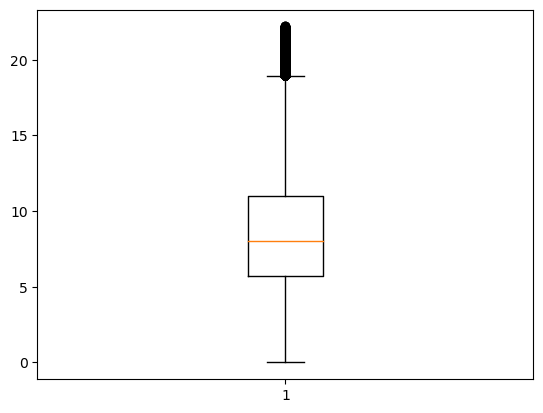

In [15]:
plt.boxplot(x=df['fare_amount'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182827 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Unnamed: 0         182827 non-null  int64              
 1   key                182827 non-null  object             
 2   fare_amount        182827 non-null  float64            
 3   pickup_datetime    182827 non-null  datetime64[ns, UTC]
 4   pickup_longitude   182827 non-null  float64            
 5   pickup_latitude    182827 non-null  float64            
 6   dropoff_longitude  182827 non-null  float64            
 7   dropoff_latitude   182827 non-null  float64            
 8   passenger_count    182827 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2), object(1)
memory usage: 13.9+ MB


In [17]:
df['pickup_datetime']=pd.to_numeric(df['pickup_datetime'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182827 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         182827 non-null  int64  
 1   key                182827 non-null  object 
 2   fare_amount        182827 non-null  float64
 3   pickup_datetime    182827 non-null  int64  
 4   pickup_longitude   182827 non-null  float64
 5   pickup_latitude    182827 non-null  float64
 6   dropoff_longitude  182827 non-null  float64
 7   dropoff_latitude   182827 non-null  float64
 8   passenger_count    182827 non-null  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 13.9+ MB


In [19]:
df=df.drop(['Unnamed: 0','key'],axis=1)

In [20]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,1431028326000000000,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,1247861096000000000,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,1251150300000000000,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,1246004541000000000,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,1409248020000000000,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199994,12.0,1391179320000000000,-73.983070,40.760770,-73.972972,40.754177,1
199995,3.0,1351421340000000000,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,1394759340000000000,-73.984722,40.736837,-74.006672,40.739620,1
199998,14.5,1432133785000000000,-73.997124,40.725452,-73.983215,40.695415,1


In [21]:
x=df.drop('fare_amount',axis=1)

In [22]:
y=df['fare_amount']

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [24]:
l=LinearRegression()

In [25]:
l.fit(x_train,y_train)

LinearRegression()

In [33]:
y_pred=l.predict(x_test)

In [34]:
from sklearn.metrics import mean_squared_error

In [35]:
print(np.sqrt(mean_squared_error(y_test,y_pred)))

4.105293069704363


In [28]:
r=RandomForestRegressor(n_estimators=10)


In [29]:
r.fit(x_train,y_train)

RandomForestRegressor(n_estimators=10)

In [36]:
y_pred=r.predict(x_test)

In [37]:
r2_score(y_test,y_pred)

0.7149913698940782

In [38]:
print(np.sqrt(mean_squared_error(y_test,y_pred)))

2.216255413415115
